### Fix pathes for import:

In [1]:
import os
import sys
import inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
folder = "problems"
hd_dir = currentdir.split(folder)[0]

if hd_dir not in sys.path:
    sys.path.insert(0, hd_dir)

# from env.equation.equation import Equation
print(hd_dir)

env_dir = os.path.join(hd_dir, 'spaces', 'math_space', 'common')
print(env_dir)

if env_dir not in sys.path:
    sys.path.insert(0, env_dir)

/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/
/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/spaces/math_space/common


In [2]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

### Import model class:

In [3]:
from envs.hs.model.model_main import ModelNet as Model
from settings.settings_main import Settings

### Add model, connection and device to settings: 

In [4]:
# make settings:
prefix = hd_dir
modelFileName = '../../../problems/1dTests/Ginzburg_Landau_equation'
modelFileName_json = os.path.join(modelFileName,"Ginzburg_Landau_equation.json")
model_path = '1dTests/Ginzburg_Landau_equation'
conn_name = "conn_base"
device_conf_name = "default"

model = Model()
model.io.loadFromFile(modelFileName)

settings =  Settings(model, conn_name, device_conf_name, "paths_hs_base", hd_prefix=prefix)


Please enter password for user valdecar:
········


INFO:settings_main:device_conf_name
INFO:settings_main:default


In [5]:
# settings.paths['hs']
# block = model.blocks[0]
# block.vertexs['[0]']

print("equations:")
print(model.equations)
print("params:")
print(model.params)
print("paramValues:")
print(model.paramValues)


equations:
[["U'=a*U+b*U*((U)^2+(V)^2)+c*D[U,{x,2}]", "V'=a*V+b*V*((U)^2+(V)^2)+c*D[V,{x,2}]"]]
params:
['a', 'b', 'c']
paramValues:
[{'b': 0.0001, 'c': 0.001, 'a': 0.01}, {'b': -0.0001, 'c': 0.001, 'a': 0.01}, {'b': 1e-05, 'c': 0.001, 'a': 0.01}, {'b': -1e-05, 'c': 0.001, 'a': 0.01}, {'b': 3e-05, 'c': 0.001, 'a': 0.01}, {'b': -3e-05, 'c': 0.001, 'a': 0.01}, {'b': 3e-05, 'c': -0.001, 'a': 0.01}]


### Progress:

In [6]:
from solvers.hs.remoterun.progresses.progress_notebook import ProgressNotebook
from solvers.hs.postproc.results.results_main import ResultPostprocNet as ResultPostproc


In [7]:
progress_params = ProgressNotebook(len(model.paramValues), prefix='param')
# display(progress_params.progress)

progress_solving = ProgressNotebook(100, prefix='solving')
# display(progress_solving.progress)
# progress_solving.succ(0)

result_postproc = ResultPostproc(hd_dir, model_path)

### Clear previous results:

In [8]:
result_postproc.remove_out()

### Run solver:

In [9]:

from solvers.hs.remoterun.remoterun import remoteProjectRun


In [10]:
clear_output()
test_name = settings.paths['model']['name']
bTest = widgets.Button(description="run %s " % (test_name))

# parametrisation:
results_params = {}

def run(event):
    model = Model()
    model.io.loadFromFile(modelFileName)
    
    for params_idx in range(len(model.paramValues)):
        
        progress_params.succ(params_idx)
        progress_solving.set_prefix("solving")
        
        # changing param:
        model.defaultParamsIndex = params_idx
        model.io.saveToFile(modelFileName_json)
        model = Model()
        model.io.loadFromFile(modelFileName)
        
        remoteProjectRun(settings, 1, progress_solving)
        
        result_postproc.extract_out(params_idx, results_params)
        result_postproc.rename_out(params_idx)
        
bTest.on_click(run)

display(progress_params.progress)
display(progress_solving.progress)

display(bTest)


INFO:remoterun:project_path
INFO:remoterun:1dTests/Ginzburg_Landau_equation
INFO:remoterun:project_name
INFO:remoterun:Ginzburg_Landau_equation
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.2)
INFO:paramiko.transport:Authentication (keyboard-interactive) successful!
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace exists...
INFO:remoterun:Workspace OK.
INFO:remoterun:Creating/cleaning project folder: 
INFO:remoterun:Folder cleaned.
INFO:remoterun:Creating settings folders: 
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/paths exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings/paths alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/device_conf exists...
INFO:remoterun:fol

['/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-V.out', '/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-U.out']


INFO:remoterun:project_path
INFO:remoterun:1dTests/Ginzburg_Landau_equation
INFO:remoterun:project_name
INFO:remoterun:Ginzburg_Landau_equation
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.2)
INFO:paramiko.transport:Authentication (keyboard-interactive) successful!
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace exists...
INFO:remoterun:Workspace OK.
INFO:remoterun:Creating/cleaning project folder: 
INFO:remoterun:Folder cleaned.
INFO:remoterun:Creating settings folders: 
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/paths exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings/paths alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/device_conf exists...
INFO:remoterun:fol

['/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-V.out', '/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-U.out']


INFO:remoterun:project_path
INFO:remoterun:1dTests/Ginzburg_Landau_equation
INFO:remoterun:project_name
INFO:remoterun:Ginzburg_Landau_equation
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.2)
INFO:paramiko.transport:Authentication (keyboard-interactive) successful!
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace exists...
INFO:remoterun:Workspace OK.
INFO:remoterun:Creating/cleaning project folder: 
INFO:remoterun:Folder cleaned.
INFO:remoterun:Creating settings folders: 
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/paths exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings/paths alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/device_conf exists...
INFO:remoterun:fol

['/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-V.out', '/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-U.out']


INFO:remoterun:project_path
INFO:remoterun:1dTests/Ginzburg_Landau_equation
INFO:remoterun:project_name
INFO:remoterun:Ginzburg_Landau_equation
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.2)
INFO:paramiko.transport:Authentication (keyboard-interactive) successful!
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace exists...
INFO:remoterun:Workspace OK.
INFO:remoterun:Creating/cleaning project folder: 
INFO:remoterun:Folder cleaned.
INFO:remoterun:Creating settings folders: 
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/paths exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings/paths alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/device_conf exists...
INFO:remoterun:fol

['/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-V.out', '/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-U.out']


INFO:remoterun:project_path
INFO:remoterun:1dTests/Ginzburg_Landau_equation
INFO:remoterun:project_name
INFO:remoterun:Ginzburg_Landau_equation
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.2)
INFO:paramiko.transport:Authentication (keyboard-interactive) successful!
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace exists...
INFO:remoterun:Workspace OK.
INFO:remoterun:Creating/cleaning project folder: 
INFO:remoterun:Folder cleaned.
INFO:remoterun:Creating settings folders: 
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/paths exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings/paths alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/device_conf exists...
INFO:remoterun:fol

['/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-V.out', '/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-U.out']


INFO:remoterun:project_path
INFO:remoterun:1dTests/Ginzburg_Landau_equation
INFO:remoterun:project_name
INFO:remoterun:Ginzburg_Landau_equation
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.2)
INFO:paramiko.transport:Authentication (keyboard-interactive) successful!
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace exists...
INFO:remoterun:Workspace OK.
INFO:remoterun:Creating/cleaning project folder: 
INFO:remoterun:Folder cleaned.
INFO:remoterun:Creating settings folders: 
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/paths exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings/paths alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/device_conf exists...
INFO:remoterun:fol

['/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-V.out', '/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-U.out']


INFO:remoterun:project_path
INFO:remoterun:1dTests/Ginzburg_Landau_equation
INFO:remoterun:project_name
INFO:remoterun:Ginzburg_Landau_equation
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.2)
INFO:paramiko.transport:Authentication (keyboard-interactive) successful!
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace exists...
INFO:remoterun:Workspace OK.
INFO:remoterun:Creating/cleaning project folder: 
INFO:remoterun:Folder cleaned.
INFO:remoterun:Creating settings folders: 
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/paths exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings/paths alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/device_conf exists...
INFO:remoterun:fol

['/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-V.out', '/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-U.out']


INFO:remoterun:project_path
INFO:remoterun:1dTests/Ginzburg_Landau_equation
INFO:remoterun:project_name
INFO:remoterun:Ginzburg_Landau_equation
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.2)
INFO:paramiko.transport:Authentication (keyboard-interactive) successful!
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace exists...
INFO:remoterun:Workspace OK.
INFO:remoterun:Creating/cleaning project folder: 
INFO:remoterun:Folder cleaned.
INFO:remoterun:Creating settings folders: 
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/paths exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings/paths alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/device_conf exists...
INFO:remoterun:fol

['/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-V.out', '/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-U.out']


INFO:remoterun:project_path
INFO:remoterun:1dTests/Ginzburg_Landau_equation
INFO:remoterun:project_name
INFO:remoterun:Ginzburg_Landau_equation
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.2)
INFO:paramiko.transport:Authentication (keyboard-interactive) successful!
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace exists...
INFO:remoterun:Workspace OK.
INFO:remoterun:Creating/cleaning project folder: 
INFO:remoterun:Folder cleaned.
INFO:remoterun:Creating settings folders: 
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/paths exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings/paths alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/device_conf exists...
INFO:remoterun:fol

['/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-V.out', '/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-U.out']


INFO:remoterun:project_path
INFO:remoterun:1dTests/Ginzburg_Landau_equation
INFO:remoterun:project_name
INFO:remoterun:Ginzburg_Landau_equation
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.2)
INFO:paramiko.transport:Authentication (keyboard-interactive) successful!
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace exists...
INFO:remoterun:Workspace OK.
INFO:remoterun:Creating/cleaning project folder: 
INFO:remoterun:Folder cleaned.
INFO:remoterun:Creating settings folders: 
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/paths exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings/paths alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/device_conf exists...
INFO:remoterun:fol

['/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-V.out', '/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-U.out']


INFO:remoterun:project_path
INFO:remoterun:1dTests/Ginzburg_Landau_equation
INFO:remoterun:project_name
INFO:remoterun:Ginzburg_Landau_equation
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.2)
INFO:paramiko.transport:Authentication (keyboard-interactive) successful!
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace exists...
INFO:remoterun:Workspace OK.
INFO:remoterun:Creating/cleaning project folder: 
INFO:remoterun:Folder cleaned.
INFO:remoterun:Creating settings folders: 
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/paths exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings/paths alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/device_conf exists...
INFO:remoterun:fol

['/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-V.out', '/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-U.out']


INFO:remoterun:project_path
INFO:remoterun:1dTests/Ginzburg_Landau_equation
INFO:remoterun:project_name
INFO:remoterun:Ginzburg_Landau_equation
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.2)
INFO:paramiko.transport:Authentication (keyboard-interactive) successful!
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace exists...
INFO:remoterun:Workspace OK.
INFO:remoterun:Creating/cleaning project folder: 
INFO:remoterun:Folder cleaned.
INFO:remoterun:Creating settings folders: 
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/paths exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings/paths alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/device_conf exists...
INFO:remoterun:fol

['/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-V.out', '/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-U.out']


INFO:remoterun:project_path
INFO:remoterun:1dTests/Ginzburg_Landau_equation
INFO:remoterun:project_name
INFO:remoterun:Ginzburg_Landau_equation
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.2)
INFO:paramiko.transport:Authentication (keyboard-interactive) successful!
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace exists...
INFO:remoterun:Workspace OK.
INFO:remoterun:Creating/cleaning project folder: 
INFO:remoterun:Folder cleaned.
INFO:remoterun:Creating settings folders: 
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/paths exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings/paths alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/device_conf exists...
INFO:remoterun:fol

['/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-V.out', '/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-U.out']


INFO:remoterun:project_path
INFO:remoterun:1dTests/Ginzburg_Landau_equation
INFO:remoterun:project_name
INFO:remoterun:Ginzburg_Landau_equation
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.2)
INFO:paramiko.transport:Authentication (keyboard-interactive) successful!
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace exists...
INFO:remoterun:Workspace OK.
INFO:remoterun:Creating/cleaning project folder: 
INFO:remoterun:Folder cleaned.
INFO:remoterun:Creating settings folders: 
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/paths exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings/paths alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/device_conf exists...
INFO:remoterun:fol

['/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-V.out', '/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-U.out']


### Results:

In [12]:
params_count = len(results_params)
vars_count = len(results_params[0])
progress_array = ProgressNotebook(params_count*vars_count, prefix='file')
params_count*vars_count

14

##### convert out to arrays:

In [13]:
display(progress_array.progress)
times, results_param_arrays = result_postproc.out_to_array(results_params, progress_array)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [14]:
# times
# results_param_arrays[5][1][times[3]]

### Plot:

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

first results:


[-0.0112989375, -0.00403965221, 0.00321958259]

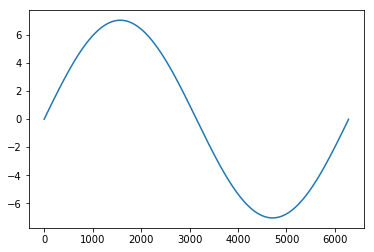

In [15]:
%matplotlib inline
params_count = len(results_param_arrays.keys())-1
vars_count = len(results_param_arrays[0].keys())-1
times_count = len(times)-1

def f(param, var, t):
    result = results_param_arrays[param][var][times[t]]
    plt.plot(result)
    print("first results:")
    display(result[:3])
w = interactive(f, param=(0, params_count, 1), var=(0, vars_count, 1), t=(0, times_count, 1))
display(w)

### Run solver for initials:

In [16]:
result_postproc.remove_out()

Ginzburg_Landau_equation-res0-V_seq0.out removed
Ginzburg_Landau_equation-res0-V_seq1.out removed
Ginzburg_Landau_equation-res0-V_seq4.out removed
Ginzburg_Landau_equation-res0-U_seq0.out removed
Ginzburg_Landau_equation-res0-U_seq3.out removed
Ginzburg_Landau_equation-res0-V_seq2.out removed
Ginzburg_Landau_equation-res0-U_seq6.out removed
Ginzburg_Landau_equation-res0-V_seq3.out removed
Ginzburg_Landau_equation-res0-V_seq5.out removed
Ginzburg_Landau_equation-res0-U_seq5.out removed
Ginzburg_Landau_equation-res0-U_seq1.out removed
Ginzburg_Landau_equation-res0-U_seq4.out removed
Ginzburg_Landau_equation-res0-U_seq2.out removed
Ginzburg_Landau_equation-res0-V_seq6.out removed
Ginzburg_Landau_equation-plot0_seq4.mp4 removed
Ginzburg_Landau_equation-plot0_seq2.mp4 removed
Ginzburg_Landau_equation-plot0_seq3.mp4 removed
Ginzburg_Landau_equation-plot0_seq6.mp4 removed
Ginzburg_Landau_equation-plot0_seq1.mp4 removed
Ginzburg_Landau_equation-plot0_seq5.mp4 removed
Ginzburg_Landau_equation-p

In [17]:
initials_data = [1.0, 3.0, 7.0]

In [18]:
progress_params = ProgressNotebook(len(initials_data), prefix='param')

In [19]:
clear_output()
test_name = settings.paths['model']['name']
bTest = widgets.Button(description="run %s " % (test_name))

# parametrisation:
results_initials = {}

def run(event):
    model = Model()
    model.io.loadFromFile(modelFileName)
    
    for initials_idx, initial_val in enumerate(initials_data):
        
        progress_params.succ(initials_idx)
        progress_solving.set_prefix("solving")
        
        # changing initials:
        new_equation_sent = str(initial_val)+"*sin(x)"
        model.initials[0].values[0] = new_equation_sent
        
        model.io.saveToFile(modelFileName_json)
        model = Model()
        model.io.loadFromFile(modelFileName)
        
        remoteProjectRun(settings, 1, progress_solving)
        
        result_postproc.extract_out(initials_idx, results_initials)
        result_postproc.rename_out(initials_idx)
                
bTest.on_click(run)

display(progress_params.progress)
display(progress_solving.progress)

display(bTest)

INFO:remoterun:project_path
INFO:remoterun:1dTests/Ginzburg_Landau_equation
INFO:remoterun:project_name
INFO:remoterun:Ginzburg_Landau_equation
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.2)
INFO:paramiko.transport:Authentication (keyboard-interactive) successful!
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace exists...
INFO:remoterun:Workspace OK.
INFO:remoterun:Creating/cleaning project folder: 
INFO:remoterun:Folder cleaned.
INFO:remoterun:Creating settings folders: 
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/paths exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings/paths alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/device_conf exists...
INFO:remoterun:fol

['/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-V.out', '/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-U.out']


INFO:remoterun:project_path
INFO:remoterun:1dTests/Ginzburg_Landau_equation
INFO:remoterun:project_name
INFO:remoterun:Ginzburg_Landau_equation
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.2)
INFO:paramiko.transport:Authentication (keyboard-interactive) successful!
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace exists...
INFO:remoterun:Workspace OK.
INFO:remoterun:Creating/cleaning project folder: 
INFO:remoterun:Folder cleaned.
INFO:remoterun:Creating settings folders: 
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/paths exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings/paths alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/device_conf exists...
INFO:remoterun:fol

['/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-V.out', '/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-U.out']


INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.2)
INFO:paramiko.transport:Authentication (keyboard-interactive) successful!
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace exists...
INFO:remoterun:Workspace OK.
INFO:remoterun:Creating/cleaning project folder: 
INFO:remoterun:Folder cleaned.
INFO:remoterun:Creating settings folders: 
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/paths exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings/paths alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/device_conf exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings/device_conf alredy exist
INFO:remoterun:settings folders created
INFO:paramiko.transport.sftp

['/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-V.out', '/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/Ginzburg_Landau_equation/out/Ginzburg_Landau_equation-res0-U.out']


### Results initials:

In [22]:
initials_count = len(results_initials)
vars_count = len(results_initials[0])
progress_array = ProgressNotebook(initials_count*vars_count, prefix='file')
initials_count*vars_count

6

##### convert out to arrays:

In [21]:
display(progress_array.progress)
times, results_initial_arrays = result_postproc.out_to_array(results_initials, progress_array)

1
2
3
4
5
6


### Plot initials:

first results:


[0.0, 0.0029999995, 0.005999996]

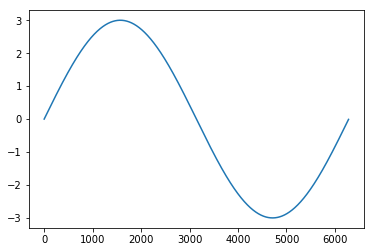

In [24]:
%matplotlib inline
initials_count = len(results_initial_arrays.keys())-1
vars_count = len(results_initial_arrays[0].keys())-1
times_count = len(times)-1

def f(param, var, t):
    result = results_initial_arrays[param][var][times[t]]
    plt.plot(result)
    print("first results:")
    display(result[:3])
w = interactive(f, param=(0, initials_count, 1), var=(0, vars_count, 1), t=(0, times_count, 1))
display(w)

##### U(x-fixed, t):

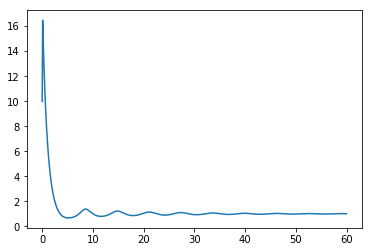

In [20]:
'''
%matplotlib inline
def f(x):
    plt.plot(time, result_x[x])
w = interactive(f,x=(0,5,1))
display(w)
'''

In [42]:
result_x

array([[  0.00000000e+00,   2.06940070e-01,   2.81882260e-01, ...,
          9.95086190e-01,   9.93937430e-01,   9.92861500e-01],
       [  1.00000000e-02,   2.07092350e-01,   2.81968170e-01, ...,
          9.95086210e-01,   9.93937450e-01,   9.92861520e-01],
       [  2.00000000e-02,   2.07548850e-01,   2.82225810e-01, ...,
          9.95086290e-01,   9.93937530e-01,   9.92861590e-01],
       [  9.98000000e+00,   1.64705428e+01,   1.49028631e+01, ...,
          1.00563151e+00,   1.00412596e+00,   1.00259925e+00],
       [  9.99000000e+00,   1.64713898e+01,   1.49034085e+01, ...,
          1.00563158e+00,   1.00412604e+00,   1.00259932e+00],
       [  1.00000000e+01,   1.64716723e+01,   1.49035904e+01, ...,
          1.00563161e+00,   1.00412606e+00,   1.00259934e+00]])